In [30]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

from scipy.stats import norm, zscore

#turn off warnings
import warnings
warnings.filterwarnings("ignore")



## Part 1. Data Cleaning ##

In [2]:
# loading the data

df = pd.read_excel('Census-mod.xlsx')

df.head(n=10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [3]:
# examining data types of each column
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [4]:
# Show how many rows and columns this dataset has

print("Number of rows : ", df.shape[0])
 
# Obtaining the number of columns
print("Number of columns : ", df.shape[1])

Number of rows :  48870
Number of columns :  15


### 1.1. Removal of Duplicates ###

In [5]:
# Tabulate and identify if there any duplicate records (not duplicate cells) in which case you need to remove them. 
# Identify these duplicates in your report. 

pd.DataFrame(df)
duplicate_records = df[df.duplicated(keep=False)]

if not duplicate_records.empty:
    print("\nDuplicate Records:")
else:
    print("\nNo Duplicate Records Found.")

display(duplicate_records)


Duplicate Records:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
18,37,Private,60548,HS-grad,9,Widowed,Machine-op-inspct,Unmarried,White,Female,0,0,20,United-States,<=50K
19,37,Private,60548,HS-grad,9,Widowed,Machine-op-inspct,Unmarried,White,Female,0,0,20,United-States,<=50K
168,42,Private,190910,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
169,42,Private,190910,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
342,29,Private,39257,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48711,35,Private,379959,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
48860,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
48861,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
48865,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [6]:
# Remove duplicated records

census = df.drop_duplicates(keep='first')

print("\nDataFrame after removing duplicates:")
display(census)


DataFrame after removing duplicates:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48864,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48865,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48867,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48868,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### 1.2. Fix Spelling Errors ###

In [7]:
# identifying unique values across categorical variables

cat_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

unique_values_list = []

# Iterate through columns of interest and populate the list with unique values and column names
for column in cat_columns:
    unique_values = df[column].unique()
    for value in unique_values:
        unique_values_list.append([column, value])

# Create a DataFrame from the list with appropriate column names
unique_values_df = pd.DataFrame(unique_values_list, columns=['Column_Name', 'Unique_Value'])

# Print the resulting DataFrame
pd.set_option('display.max_rows', None)
print("DataFrame with column names and unique values:")
display(unique_values_df)

DataFrame with column names and unique values:


,Column_Name,Unique_Value
0,workclass,Private
1,workclass,Local-gov
2,workclass,?
3,workclass,Self-emp-not-inc
4,workclass,Federal-gov
5,workclass,State-gov
6,workclass,Self-emp-inc
7,workclass,Without-pay
8,workclass,Never-worked
9,education,11th


In [8]:
census['relationship']

0             Own-child
1               Husband
2               Husband
3               Husband
4             Own-child
5         Not-in-family
6             Unmarried
7               Husband
8             Unmarried
9               Husband
10              Husband
11              Husband
12        Not-in-family
13              Husband
14              Husband
15              Husband
16            Own-child
17                 Wife
18            Unmarried
20              husband
21              Husband
22            Own-child
23        Not-in-family
24        Not-in-family
25              Husband
26              Husband
27            Own-child
28            Unmarried
29              Husband
30        Not-in-family
31              Husband
32            Unmarried
33        Not-in-family
34              Husband
35            Unmarried
36              husband
37              Husband
38        Not-in-family
39        Not-in-family
40            Own-child
41              Husband
42              

In [9]:
# consistency of spelling within categorical variables

# marital-status
census.loc[:, 'marital-status'] = census['marital-status'].str.replace('married-AF-spouse', 'Married-AF-spouse')

# relationship
census.loc[:, 'relationship'] = census['relationship'].str.replace('husband', 'Husband')
census.loc[:, 'relationship'] = census['relationship'].str.replace('wife', 'Wife')

# sex
census.loc[:, 'sex'] = census['sex'].str.replace('Mole', 'Male')
census.loc[:, 'sex'] = census['sex'].str.replace('Femole', 'Female')

#native-country 
census.loc[:, 'native-country'] = census['native-country'].str.replace('Hong', 'Hong-Kong')

### 1.3. Imputing Missing Data ###

In [10]:
# missing values "?" within categorical variables

for column in cat_columns:
    census.loc[:, column] = census[column].str.replace('?', 'Others')

In [11]:
## check data ##

cleaned_unique = []

# Iterate through columns of interest and populate the list with unique values and column names
for column in cat_columns:
    unique_values = census[column].unique()
    for value in unique_values:
        cleaned_unique.append([column, value])

# Create a DataFrame from the list with appropriate column names
unique_df = pd.DataFrame(cleaned_unique, columns=['Column_Name', 'Unique_Value'])

# Print the resulting DataFrame
pd.set_option('display.max_rows', None)
print("DataFrame with column names and unique values:")
display(unique_df)

DataFrame with column names and unique values:


,Column_Name,Unique_Value
0,workclass,Private
1,workclass,Local-gov
2,workclass,Others
3,workclass,Self-emp-not-inc
4,workclass,Federal-gov
5,workclass,State-gov
6,workclass,Self-emp-inc
7,workclass,Without-pay
8,workclass,Never-worked
9,education,11th


In [12]:
# check for missing values in numerical columns 
num_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

missing_values = []

# Loop through numerical columns and check for missing values (represented by 99999)
for column in num_columns:
    if (census[column] == 99999).any():
        missing_values.append(column)

missing_values

['capital-gain']

In [13]:
# inspect missing values in capital-gain
missing = census['capital-gain'] == 99999
missing_indices = census[missing].index

# original
census[missing]

# suggested (to save space)
print(f"number of rows with missing capital gain: {len(census[missing])}")

number of rows with missing capital gain: 244


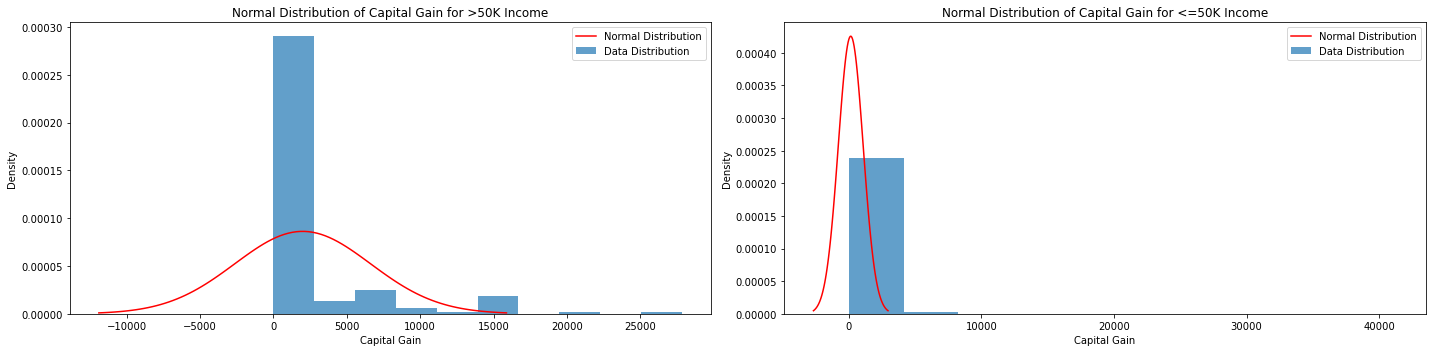

In [47]:
# missing values within capital-gain have income >50k, examine distribution of >50k and <= 50K

income_groups = ['>50K', '<=50K']

# Create subplots to visualize the normal distribution of 'capital-gain' for each income group
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

for i, group in enumerate(income_groups):
    # Filter data for the current income group
    group_data = census[census['income'] == group]['capital-gain']
    
    # Calculate mean and standard deviation of 'capital-gain' for the current group
    mu, std = group_data.mean(), group_data.std()
    
    # Generate values for the x-axis
    x = np.linspace(mu - 3*std, mu + 3*std, 100)
    
    # Calculate the PDF (Probability Density Function) for the normal distribution
    pdf = norm.pdf(x, mu, std)
    
    # Plot the normal distribution curve
    axes[i].plot(x, pdf, 'r-', label='Normal Distribution')
    axes[i].hist(group_data, bins=10, density=True, alpha=0.7, label='Data Distribution')
    axes[i].set_title(f'Normal Distribution of Capital Gain for {group} Income')
    axes[i].set_xlabel('Capital Gain')
    axes[i].set_ylabel('Density')
    axes[i].legend()

# Show the plots
plt.tight_layout()
plt.show()

In [15]:
# Calculate the mean of 'capital-gain' for the income group '>50K' excluding values of 99999
mean_capgain = census[(census['income'] == '>50K') & (census['capital-gain'] != 99999)]['capital-gain'].mean()

# Replace missing values (99999) in 'capital-gain' for income group '>50K' with the calculated mean
census.loc[(census['income'] == '>50K') & (census['capital-gain'] == 99999), 'capital-gain'] = mean_capgain

(census['capital-gain'] == 99999).any()

False

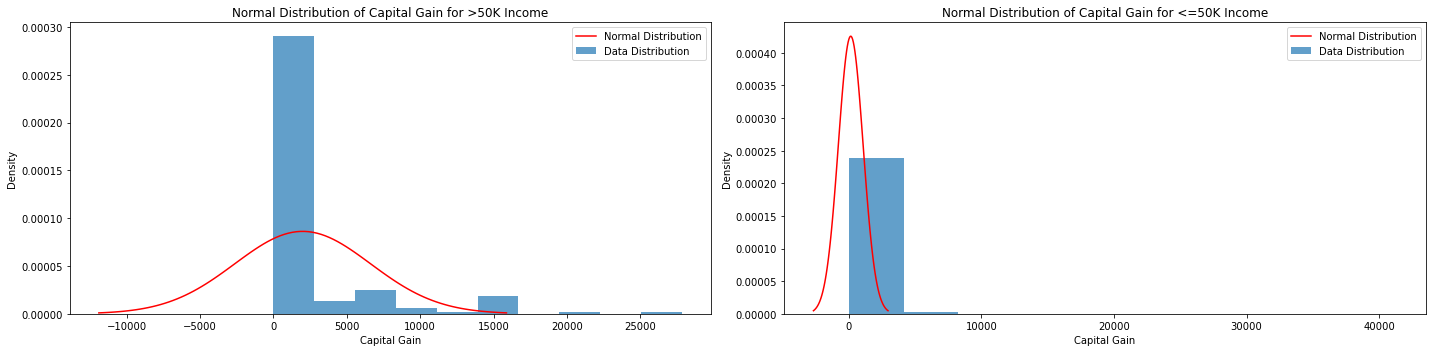

In [46]:
income_groups = ['>50K', '<=50K']

# Create subplots to visualize the normal distribution of 'capital-gain' for each income group
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

for i, group in enumerate(income_groups):
    # Filter data for the current income group
    group_data = census[census['income'] == group]['capital-gain']
    
    # Calculate mean and standard deviation of 'capital-gain' for the current group
    mu, std = group_data.mean(), group_data.std()
    
    # Generate values for the x-axis
    x = np.linspace(mu - 3*std, mu + 3*std, 100)
    
    # Calculate the PDF (Probability Density Function) for the normal distribution
    pdf = norm.pdf(x, mu, std)
    
    # Plot the normal distribution curve
    axes[i].plot(x, pdf, 'r-', label='Normal Distribution')
    axes[i].hist(group_data, bins=10, density=True, alpha=0.7, label='Data Distribution')
    axes[i].set_title(f'Normal Distribution of Capital Gain for {group} Income')
    axes[i].set_xlabel('Capital Gain')
    axes[i].set_ylabel('Density')
    axes[i].legend()

# Show the plots
plt.tight_layout()
plt.show()

### 2. Correlation between Variables ###

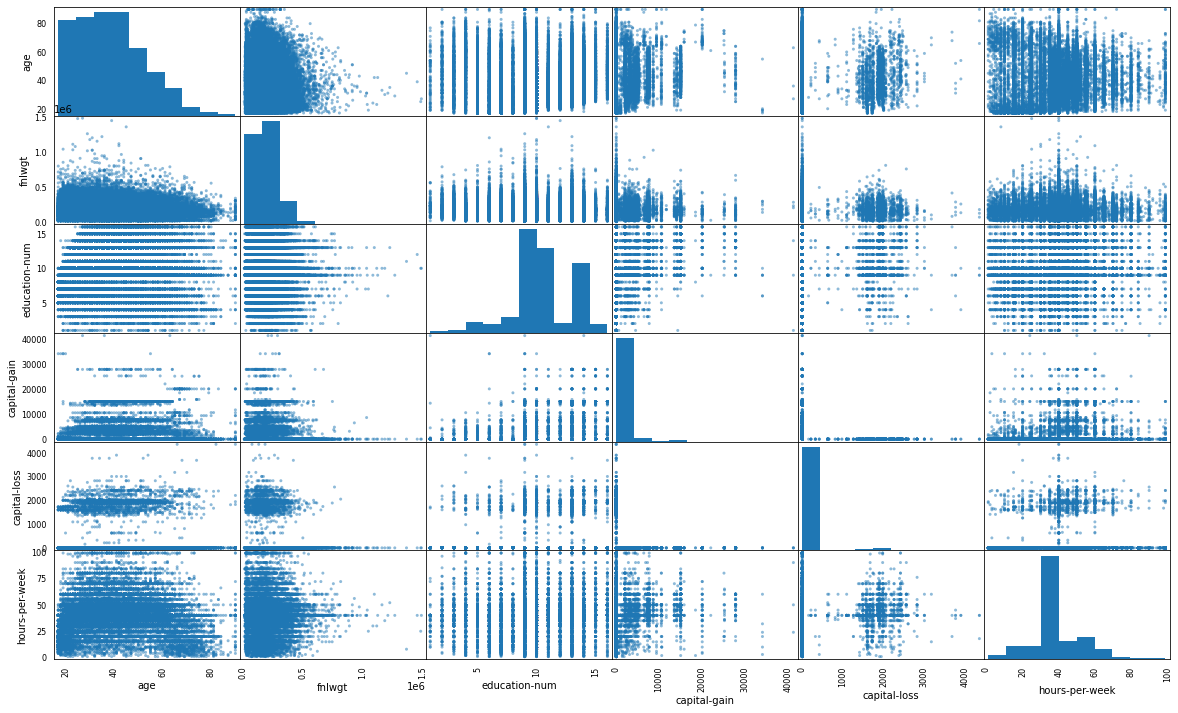

In [17]:
#plot scatter matrix
pd.plotting.scatter_matrix(census, alpha=0.5, figsize=(20, 12), diagonal='hist')
#turn off x and y axis ticks for all subplots for greater clarity
for ax in plt.gcf().get_axes():
    ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

plt.show()

In [18]:
#calculate correlation
correlation_matrix = census.corr()
correlation_matrix

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076451,0.030635,0.114846,0.056838,0.071223
fnlwgt,-0.076451,1.000000,-0.038727,-0.003383,-0.004378,-0.013521
education-num,0.030635,-0.038727,1.000000,0.146770,0.080986,0.143915
capital-gain,0.114846,-0.003383,0.146770,1.000000,-0.050601,0.084890
capital-loss,0.056838,-0.004378,0.080986,-0.050601,1.000000,0.054431
hours-per-week,0.071223,-0.013521,0.143915,0.084890,0.054431,1.000000


### 3. Outlier Detection ##

<AxesSubplot:>

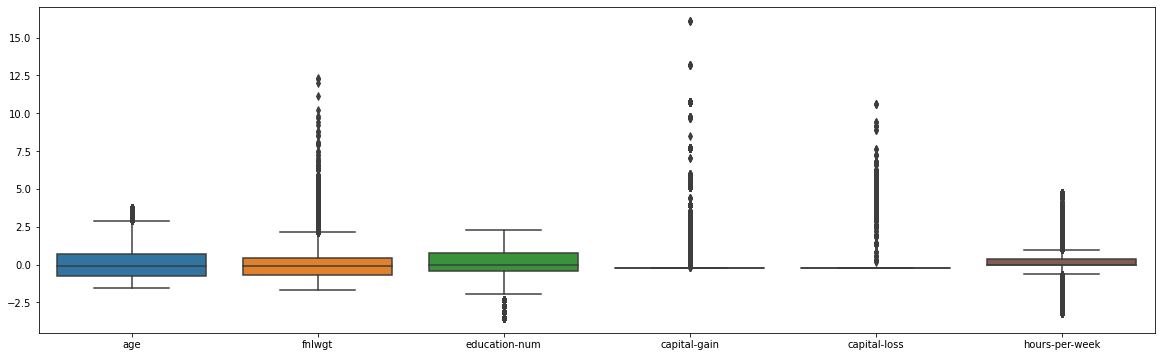

In [48]:
#show outliers using boxplot (only for numeric variables since boxplots can only capture outliers based on standard deviation)
plt.figure(figsize=(20, 6))

#normalize data using zscore
sns.boxplot(data=zscore(census[num_columns]))

In [21]:
#generate a column for each numeric variable indicating if a row is an outlier for the given variable
#based on |zscore| threshold of 1.5, in line with boxplot thresholds
for c in num_columns:
    zs = zscore(census[c])
    df[f"is_outlier_{c}"] =  zs > 1.5
    print(f"{len(zs[zs>1.5])} ({len(zs[zs>1.5])/len(census)*100:.2f}%) outliers for {c}")

4054 (8.31%) outliers for age
3728 (7.64%) outliers for fnlwgt
4084 (8.37%) outliers for education-num
2395 (4.91%) outliers for capital-gain
2247 (4.61%) outliers for capital-loss
3853 (7.90%) outliers for hours-per-week


### 4. Frequency Distribution for Each Feature by Label Classes ###

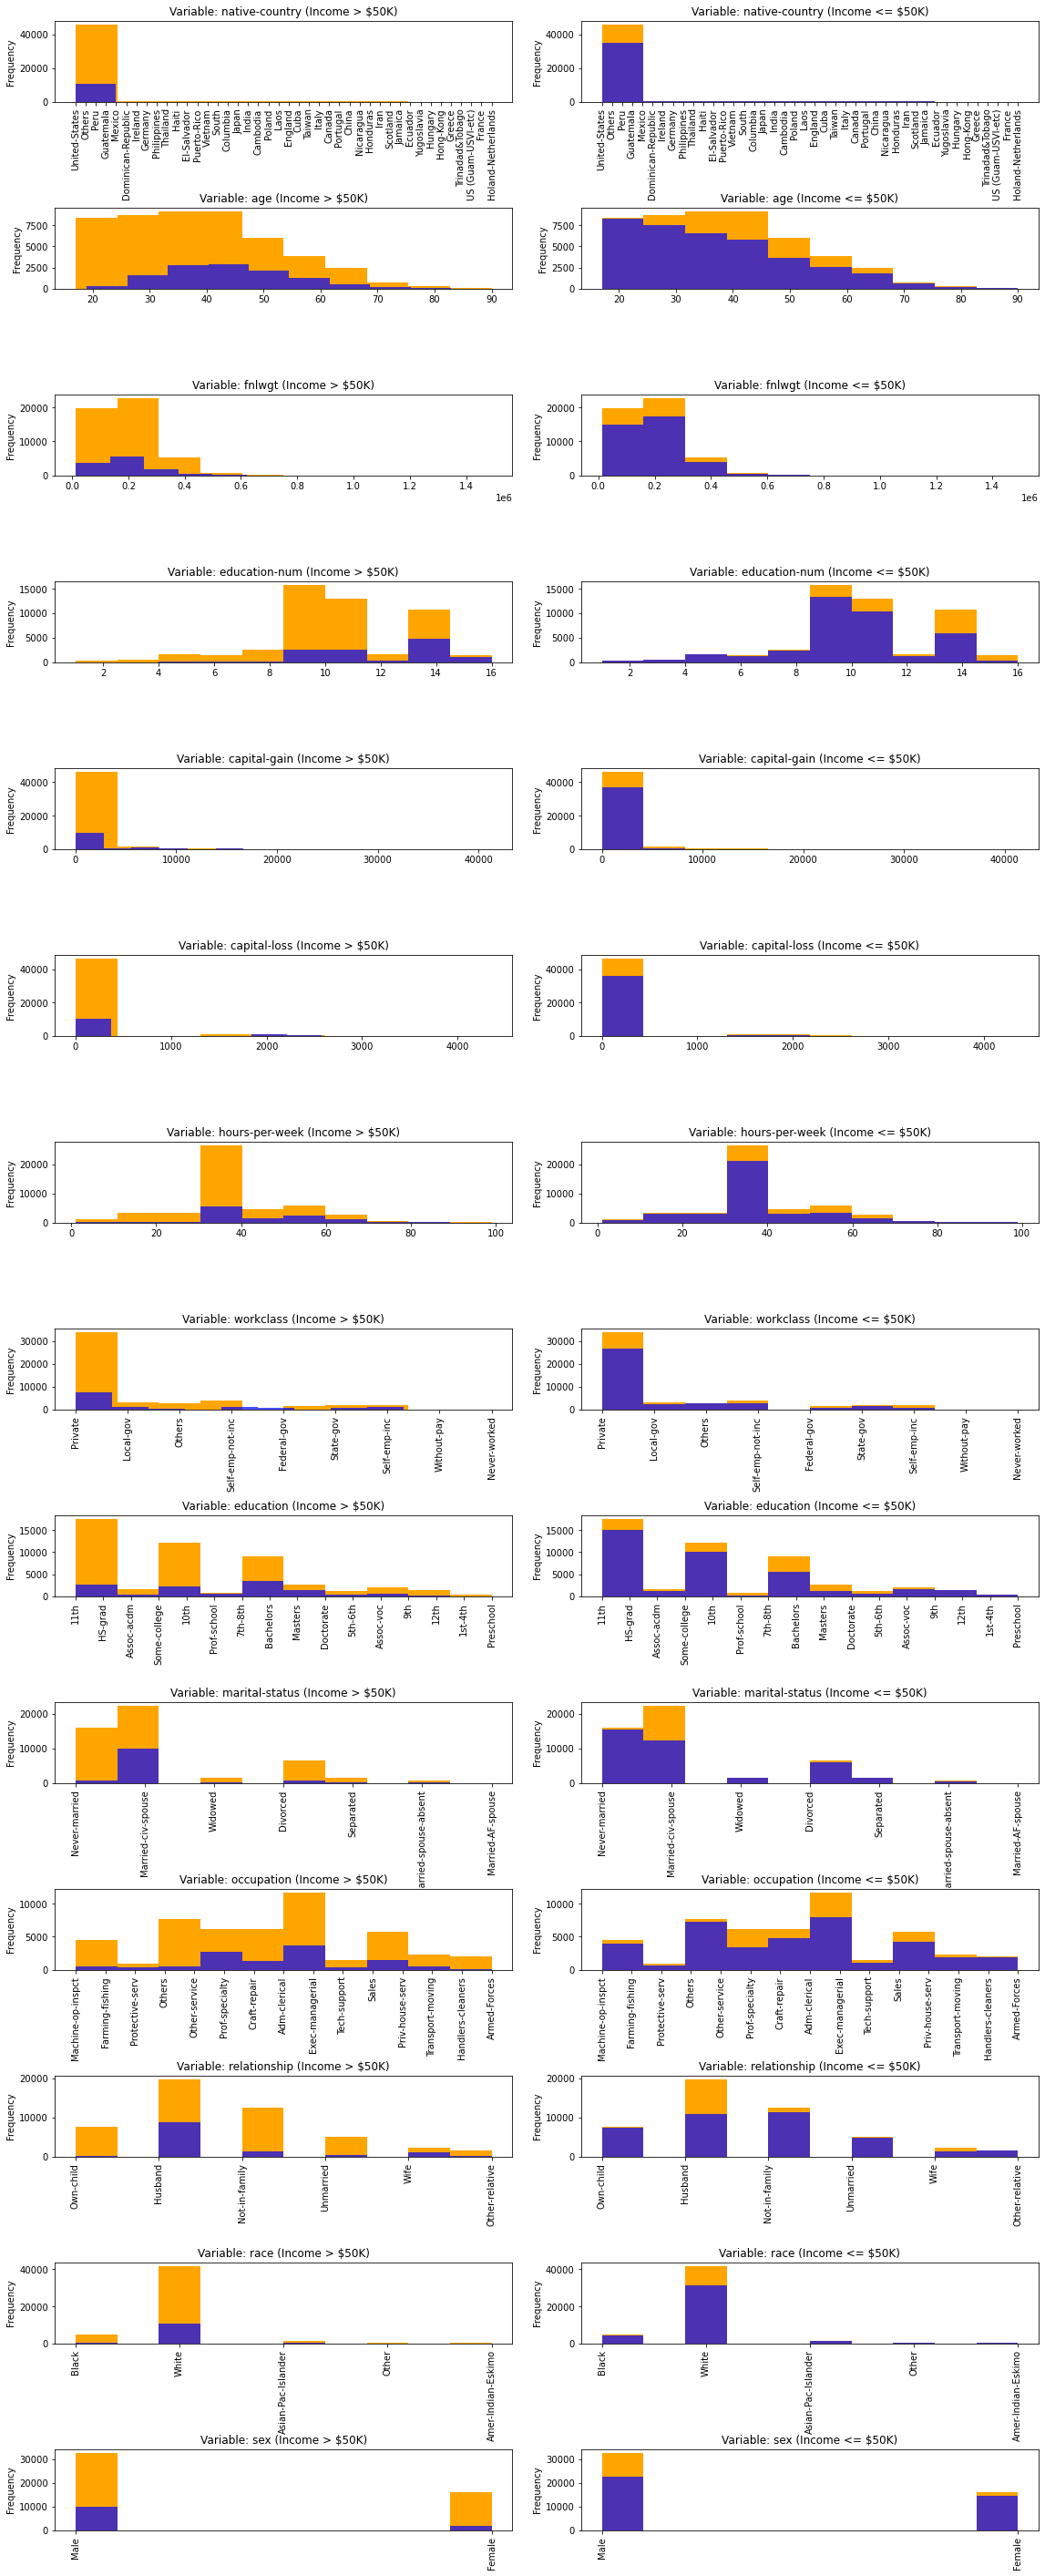

In [49]:
#separate dataframes based on y variable
gt_50 = census.loc[census["income"] == ">50K",:]
lte_50 = census.loc[census["income"] == "<=50K",:]

fig, ax = plt.subplots(14, 2, figsize = (20, 45))
all_cols = [c for c in [*num_columns, *cat_columns] if c != "income"]

for i in range(0, len(all_cols)):
    #calculate col and row number for subplot
    col_name = all_cols[i-1]

    #plot into the designated cell
    ax[i, 0].hist(census[col_name], color = "orange")
    ax[i, 0].hist(gt_50[col_name], color = "blue", alpha = 0.7)
    ax[i, 0].set_title(f"Variable: {col_name} (Income > $50K)")

    ax[i, 1].hist(census[col_name], color = "orange")
    ax[i, 1].hist(lte_50[col_name], color = "blue", alpha = 0.7)
    ax[i, 1].set_title(f"Variable: {col_name} (Income <= $50K)")

    ax[i, 0].set_ylabel("Frequency")
    ax[i, 1].set_ylabel("Frequency")

    #rotate x tick label if it's a categorical variable
    if col_name in cat_columns:
        for tick in ax[i, 0].get_xticklabels():
            tick.set_rotation(90)
        for tick in ax[i, 1].get_xticklabels():
            tick.set_rotation(90)

#set spacing
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.85, top=0.95, wspace=0.15, hspace=1.3)

plt.show()